In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_columns', None)

# Read and clean data

In [2]:
def clean_price(df, col):
    df[col] = df[col].str.replace('$', '', regex=False)
    df[col] = df[col].str.replace(',', '', regex=False)
    df[col] = pd.to_numeric(df[col], downcast="float")
    return df

In [3]:
def clean_availability(df, col):
    df[col] = df[col].replace({'t':True,'f':False},regex=True)
    return df

In [4]:
berlin_calendar = pd.read_csv('data/berlin/calendar_summary.csv')
berlin_calendar = clean_price(berlin_calendar, 'price')
berlin_calendar = clean_availability(berlin_calendar, 'available')
berlin_calendar.head()

,listing_id,date,available,price
0,2015,2019-09-10,False,NaN
1,2015,2019-09-09,False,NaN
2,2015,2019-09-08,False,NaN
3,2015,2019-09-07,False,NaN
4,2015,2019-09-06,False,NaN


In [5]:
berlin_listings = pd.read_csv('data/berlin/listings.csv')
berlin_listings = berlin_listings.rename(columns={'id': 'listing_id'})
berlin_listings.head()

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


In [6]:
berlin_listings_sum = pd.read_csv('data/berlin/listings_summary.csv')
berlin_listings_sum = clean_price(berlin_listings_sum, 'price')
berlin_listings_sum.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,60.0,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,https://www.airbnb.com/rooms/2695,20181107122246,2018-11-07,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,none,NaN,NaN,Within walking distance you'll find the S-Bahn...,Außer deinem Zimmer kannst du noch die Küche u...,NaN,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/97d4f6e8-1...,NaN,2986,https://www.airbnb.com/users/show/2986,Michael,2008-09-16,"Berlin, Berlin, Germany",Living with my wife in Berlin. Like travellin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/50434955-1...,https://a0.muscache.com/im/pictures/50434955-1...,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,17.0,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,2018-11-07,6,2018-07-04,2018-10-01,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,NaN,f,f,flexible,f,f,1,1.42
2,3176,https://www.airbnb.com/rooms/3176,20181107122246,2018-11-07

# Price distribution

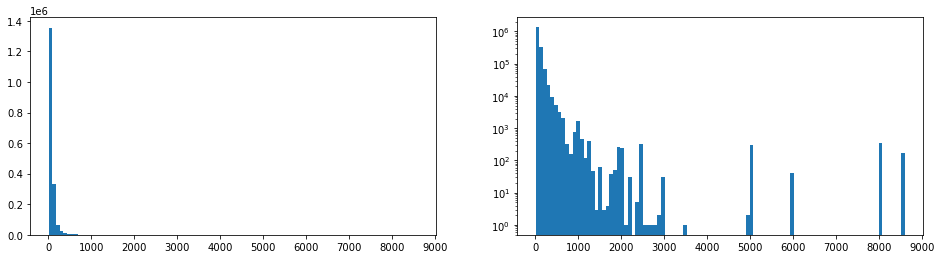

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,4))

ax1.set_xticks(np.arange(0, 10000, step=1000))
ax1.hist(berlin_calendar['price'], bins = 100)

ax2.set_yscale('log')
ax2.set_xticks(np.arange(0, 10000, step=1000))
ax2.hist(berlin_calendar['price'], bins = 100)

plt.show()

In [8]:
berlin_calendar['price'].describe()

count    1.800841e+06
mean     8.525882e+01
std      1.824134e+02
min      9.000000e+00
25%      4.000000e+01
50%      6.000000e+01
75%      9.300000e+01
max      8.600000e+03
Name: price, dtype: float64

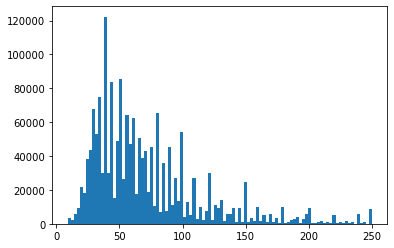

In [9]:
## Remove outliers from all datasets
berlin_calendar = berlin_calendar[berlin_calendar['price'] <= 250]
berlin_listings = berlin_listings[berlin_listings['price'] <= 250]
berlin_listings_sum = berlin_listings_sum[berlin_listings_sum['price'] <= 250]
plt.hist(berlin_calendar['price'], bins = 100)
plt.show()

In [10]:
berlin_calendar['price'].describe()

count    1.748601e+06
mean     7.094866e+01
std      4.417343e+01
min      9.000000e+00
25%      4.000000e+01
50%      5.900000e+01
75%      8.900000e+01
max      2.500000e+02
Name: price, dtype: float64

# Average price over time

In [11]:
berlin_price_grouped_by_date = berlin_calendar.drop(columns=['listing_id','available']).groupby(['date']).mean().reset_index()

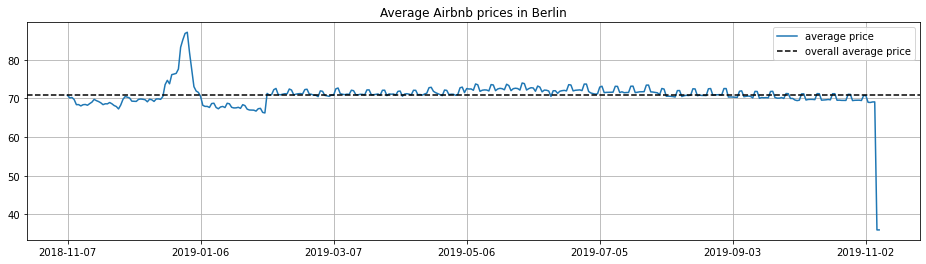

In [12]:
fig, axs = plt.subplots(1, 1, figsize=(16,4))
axs.set_title('Average Airbnb prices in Berlin')
axs.xaxis.set_major_locator(plt.MaxNLocator(8))
axs.grid(b=None, which='major', axis='both')
axs.plot(berlin_price_grouped_by_date['date'], berlin_price_grouped_by_date['price'], color='tab:blue')
axs.axhline(berlin_price_grouped_by_date['price'].mean(), color='black', ls='--')
axs.legend(['average price','overall average price'])
plt.show()

In [13]:
berlin_calendar['price'].describe()

count    1.748601e+06
mean     7.094866e+01
std      4.417343e+01
min      9.000000e+00
25%      4.000000e+01
50%      5.900000e+01
75%      8.900000e+01
max      2.500000e+02
Name: price, dtype: float64

# Average price over time per neighbourhood

In [14]:
berlin_price_with_neighbourhood = pd.merge(berlin_calendar, berlin_listings[['listing_id', 'neighbourhood']], how='left', on=['listing_id'])
berlin_price_with_neighbourhood = berlin_price_with_neighbourhood.drop(columns=['listing_id','available']).groupby(['date', 'neighbourhood']).mean()
berlin_price_with_neighbourhood = berlin_price_with_neighbourhood.reset_index()
berlin_price_with_neighbourhood.head()

,date,neighbourhood,price
0,2018-11-07,Adlershof,67.250000
1,2018-11-07,Albrechtstr.,43.200001
2,2018-11-07,Alexanderplatz,81.832115
3,2018-11-07,Allende-Viertel,50.000000
4,2018-11-07,Alt Treptow,47.571430


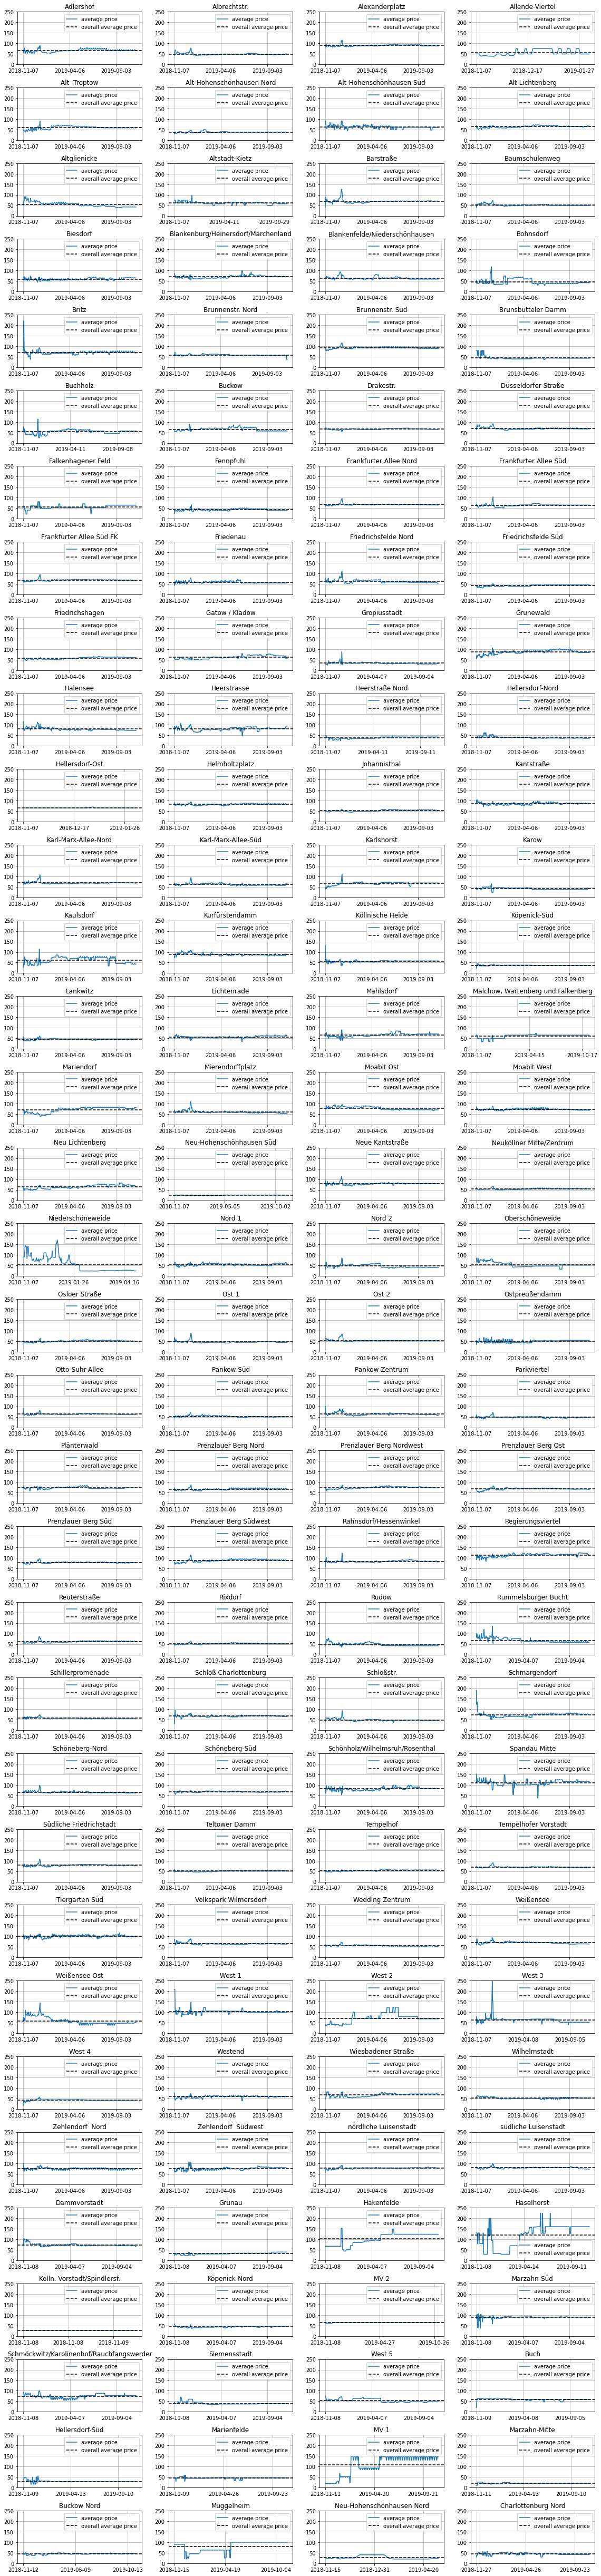

In [15]:
neighbourhoods = berlin_price_with_neighbourhood['neighbourhood'].unique()
fig, axs = plt.subplots(len(neighbourhoods)//4, 4, figsize=(16,1*len(neighbourhoods)//2))

i=0
for row in axs:
    for col in row:
        values = berlin_price_with_neighbourhood[berlin_price_with_neighbourhood['neighbourhood'] == neighbourhoods[i]]
        overall_mean = berlin_price_with_neighbourhood[berlin_price_with_neighbourhood['neighbourhood'] == neighbourhoods[i]].mean()
        col.set_title(neighbourhoods[i])
        col.xaxis.set_major_locator(plt.MaxNLocator(3))
        col.yaxis.set_major_locator(plt.MaxNLocator(5))
        col.set_ylim(ymax = 250, ymin = 0)
        col.grid(b=None, which='major', axis='both')
        col.plot(values['date'], values['price'], color='tab:blue')
        col.axhline(overall_mean[0], color='black', ls='--')
        col.legend(['average price','overall average price'])
        i=i+1

fig.tight_layout()
plt.show()

# Basic properties distributions

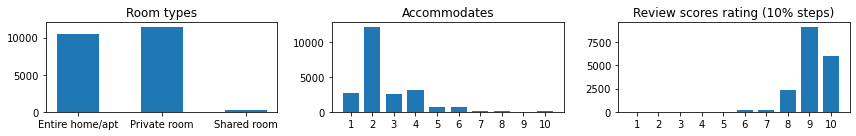

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,2))
ax1.hist(berlin_listings_sum['room_type'], np.arange(0, 3, 0.5), color='tab:blue', rwidth=1)
ax1.set_xticks(np.arange(0.25, 3, step=1))
ax1.set_title('Room types')

ax2.hist(berlin_listings_sum['accommodates'], np.arange(0.5, 11, 1), color='tab:blue', rwidth=0.75)
ax2.set_xticks(np.arange(1, 11, step=1))
ax2.set_title('Accommodates')

ax3.hist(berlin_listings_sum['review_scores_rating']//10, np.arange(0.5, 11, 1), color='tab:blue', rwidth=0.75)
ax3.set_xticks(np.arange(1, 11, step=1))
ax3.set_title('Review scores rating (10% steps)')

fig.tight_layout()
plt.show()

# Feature analysis

### Create dummies

In [17]:
data = berlin_listings_sum.drop(columns=['id','extra_people','cleaning_fee', 'security_deposit','neighbourhood_group_cleansed','cancellation_policy','number_of_reviews', 'property_type', 'minimum_nights', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'weekly_price', 'monthly_price', 'maximum_nights', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped', 'first_review', 'last_review', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'requires_license', 'jurisdiction_names', 'instant_bookable', 'is_business_travel_ready', 'require_guest_profile_picture', 'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month', 'license'])

In [18]:
data = pd.get_dummies(data, columns=['neighbourhood_cleansed', 'room_type', 'bed_type'])

In [19]:
data['amenities'] = data['amenities'].str.replace('[{}" ]', '', regex=True)
data = pd.concat([data, data.amenities.str.get_dummies(sep = ",")], axis=1).drop(columns=['amenities'])

In [20]:
data.head()

,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,review_scores_rating,neighbourhood_cleansed_Adlershof,neighbourhood_cleansed_Albrechtstr.,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Allende-Viertel,neighbourhood_cleansed_Alt Treptow,neighbourhood_cleansed_Alt-Hohenschönhausen Nord,neighbourhood_cleansed_Alt-Hohenschönhausen Süd,neighbourhood_cleansed_Alt-Lichtenberg,neighbourhood_cleansed_Altglienicke,neighbourhood_cleansed_Altstadt-Kietz,neighbourhood_cleansed_Barstraße,neighbourhood_cleansed_Baumschulenweg,neighbourhood_cleansed_Biesdorf,neighbourhood_cleansed_Blankenburg/Heinersdorf/Märchenland,neighbourhood_cleansed_Blankenfelde/Niederschönhausen,neighbourhood_cleansed_Bohnsdorf,neighbourhood_cleansed_Britz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Brunsbütteler Damm,neighbourhood_cleansed_Buch,neighbourhood_cleansed_Buchholz,neighbourhood_cleansed_Buckow,neighbourhood_cleansed_Buckow Nord,neighbourhood_cleansed_Charlottenburg Nord,neighbourhood_cleansed_Dammvorstadt,neighbourhood_cleansed_Drakestr.,neighbourhood_cleansed_Düsseldorfer Straße,neighbourhood_cleansed_Falkenhagener Feld,neighbourhood_cleansed_Fennpfuhl,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Friedenau,neighbourhood_cleansed_Friedrichsfelde Nord,neighbourhood_cleansed_Friedrichsfelde Süd,neighbourhood_cleansed_Friedrichshagen,neighbourhood_cleansed_Gatow / Kladow,neighbourhood_cleansed_Gropiusstadt,neighbourhood_cleansed_Grunewald,neighbourhood_cleansed_Grünau,neighbourhood_cleansed_Hakenfelde,neighbourhood_cleansed_Halensee,neighbourhood_cleansed_Haselhorst,neighbourhood_cleansed_Heerstrasse,neighbourhood_cleansed_Heerstraße Nord,neighbourhood_cleansed_Hellersdorf-Nord,neighbourhood_cleansed_Hellersdorf-Ost,neighbourhood_cleansed_Hellersdorf-Süd,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Johannisthal,neighbourhood_cleansed_Kantstraße,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Karlshorst,neighbourhood_cleansed_Karow,neighbourhood_cleansed_Kaulsdorf,neighbourhood_cleansed_Kurfürstendamm,neighbourhood_cleansed_Kölln. Vorstadt/Spindlersf.,neighbourhood_cleansed_Köllnische Heide,neighbourhood_cleansed_Köpenick-Nord,neighbourhood_cleansed_Köpenick-Süd,neighbourhood_cleansed_Lankwitz,neighbourhood_cleansed_Lichtenrade,neighbourhood_cleansed_MV 1,neighbourhood_cleansed_MV 2,neighbourhood_cleansed_Mahlsdorf,"neighbourhood_cleansed_Malchow, Wartenberg und Falkenberg",neighbourhood_cleansed_Mariendorf,neighbourhood_cleansed_Marienfelde,neighbourhood_cleansed_Marzahn-Mitte,neighbourhood_cleansed_Marzahn-Süd,neighbourhood_cleansed_Mierendorffplatz,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Müggelheim,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neu-Hohenschönhausen Nord,neighbourhood_cleansed_Neu-Hohenschönhausen Süd,neighbourhood_cleansed_Neue Kantstraße,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Niederschöneweide,neighbourhood_cleansed_Nord 1,neighbourhood_cleansed_Nord 2,neighbourhood_cleansed_Oberschöneweide,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Ost 1,neighbourhood_cleansed_Ost 2,neighbourhood_cleansed_Ostpreußendamm,neighbourhood_cleansed_Otto-Suhr-Allee,neighbourhood_cleansed_Pankow Süd,neighbourhood_cleansed_Pankow Zentrum,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Plänterwald,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Rahnsdorf/Hessenwinkel,neighbourhood_cleansed_Regierungsviertel,neighbourhood_cleansed_Reuterstraße,neighbourhood_cle

### Scale data

In [21]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included', 'review_scores_rating']
data[cols] = scaler.fit_transform(data[cols])

In [22]:
data.isnull().sum(axis = 0).sort_values(ascending = False).head(10)

square_feet             21862
review_scores_rating     4302
beds                       36
bathrooms                  32
bedrooms                   18
accommodates                0
Doorman                     0
Ethernetconnection          0
Essentials                  0
Elevator                    0
dtype: int64

In [23]:
data['square_feet'] = data['square_feet'].fillna(data['square_feet'].mean())
data['review_scores_rating'] = data['review_scores_rating'].fillna(data['review_scores_rating'].mean())
data = data.dropna()

In [24]:
data.head()

,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,review_scores_rating,neighbourhood_cleansed_Adlershof,neighbourhood_cleansed_Albrechtstr.,neighbourhood_cleansed_Alexanderplatz,neighbourhood_cleansed_Allende-Viertel,neighbourhood_cleansed_Alt Treptow,neighbourhood_cleansed_Alt-Hohenschönhausen Nord,neighbourhood_cleansed_Alt-Hohenschönhausen Süd,neighbourhood_cleansed_Alt-Lichtenberg,neighbourhood_cleansed_Altglienicke,neighbourhood_cleansed_Altstadt-Kietz,neighbourhood_cleansed_Barstraße,neighbourhood_cleansed_Baumschulenweg,neighbourhood_cleansed_Biesdorf,neighbourhood_cleansed_Blankenburg/Heinersdorf/Märchenland,neighbourhood_cleansed_Blankenfelde/Niederschönhausen,neighbourhood_cleansed_Bohnsdorf,neighbourhood_cleansed_Britz,neighbourhood_cleansed_Brunnenstr. Nord,neighbourhood_cleansed_Brunnenstr. Süd,neighbourhood_cleansed_Brunsbütteler Damm,neighbourhood_cleansed_Buch,neighbourhood_cleansed_Buchholz,neighbourhood_cleansed_Buckow,neighbourhood_cleansed_Buckow Nord,neighbourhood_cleansed_Charlottenburg Nord,neighbourhood_cleansed_Dammvorstadt,neighbourhood_cleansed_Drakestr.,neighbourhood_cleansed_Düsseldorfer Straße,neighbourhood_cleansed_Falkenhagener Feld,neighbourhood_cleansed_Fennpfuhl,neighbourhood_cleansed_Frankfurter Allee Nord,neighbourhood_cleansed_Frankfurter Allee Süd,neighbourhood_cleansed_Frankfurter Allee Süd FK,neighbourhood_cleansed_Friedenau,neighbourhood_cleansed_Friedrichsfelde Nord,neighbourhood_cleansed_Friedrichsfelde Süd,neighbourhood_cleansed_Friedrichshagen,neighbourhood_cleansed_Gatow / Kladow,neighbourhood_cleansed_Gropiusstadt,neighbourhood_cleansed_Grunewald,neighbourhood_cleansed_Grünau,neighbourhood_cleansed_Hakenfelde,neighbourhood_cleansed_Halensee,neighbourhood_cleansed_Haselhorst,neighbourhood_cleansed_Heerstrasse,neighbourhood_cleansed_Heerstraße Nord,neighbourhood_cleansed_Hellersdorf-Nord,neighbourhood_cleansed_Hellersdorf-Ost,neighbourhood_cleansed_Hellersdorf-Süd,neighbourhood_cleansed_Helmholtzplatz,neighbourhood_cleansed_Johannisthal,neighbourhood_cleansed_Kantstraße,neighbourhood_cleansed_Karl-Marx-Allee-Nord,neighbourhood_cleansed_Karl-Marx-Allee-Süd,neighbourhood_cleansed_Karlshorst,neighbourhood_cleansed_Karow,neighbourhood_cleansed_Kaulsdorf,neighbourhood_cleansed_Kurfürstendamm,neighbourhood_cleansed_Kölln. Vorstadt/Spindlersf.,neighbourhood_cleansed_Köllnische Heide,neighbourhood_cleansed_Köpenick-Nord,neighbourhood_cleansed_Köpenick-Süd,neighbourhood_cleansed_Lankwitz,neighbourhood_cleansed_Lichtenrade,neighbourhood_cleansed_MV 1,neighbourhood_cleansed_MV 2,neighbourhood_cleansed_Mahlsdorf,"neighbourhood_cleansed_Malchow, Wartenberg und Falkenberg",neighbourhood_cleansed_Mariendorf,neighbourhood_cleansed_Marienfelde,neighbourhood_cleansed_Marzahn-Mitte,neighbourhood_cleansed_Marzahn-Süd,neighbourhood_cleansed_Mierendorffplatz,neighbourhood_cleansed_Moabit Ost,neighbourhood_cleansed_Moabit West,neighbourhood_cleansed_Müggelheim,neighbourhood_cleansed_Neu Lichtenberg,neighbourhood_cleansed_Neu-Hohenschönhausen Nord,neighbourhood_cleansed_Neu-Hohenschönhausen Süd,neighbourhood_cleansed_Neue Kantstraße,neighbourhood_cleansed_Neuköllner Mitte/Zentrum,neighbourhood_cleansed_Niederschöneweide,neighbourhood_cleansed_Nord 1,neighbourhood_cleansed_Nord 2,neighbourhood_cleansed_Oberschöneweide,neighbourhood_cleansed_Osloer Straße,neighbourhood_cleansed_Ost 1,neighbourhood_cleansed_Ost 2,neighbourhood_cleansed_Ostpreußendamm,neighbourhood_cleansed_Otto-Suhr-Allee,neighbourhood_cleansed_Pankow Süd,neighbourhood_cleansed_Pankow Zentrum,neighbourhood_cleansed_Parkviertel,neighbourhood_cleansed_Plänterwald,neighbourhood_cleansed_Prenzlauer Berg Nord,neighbourhood_cleansed_Prenzlauer Berg Nordwest,neighbourhood_cleansed_Prenzlauer Berg Ost,neighbourhood_cleansed_Prenzlauer Berg Süd,neighbourhood_cleansed_Prenzlauer Berg Südwest,neighbourhood_cleansed_Rahnsdorf/Hessenwinkel,neighbourhood_cleansed_Regierungsviertel,neighbourhood_cleansed_Reuterstraße,neighbourhood_cle

### Fit model and get feature importance

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

y = data['price']
x = data.drop(columns = ['price'])

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)

model=Ridge()
model.fit(x_train,y_train);

In [26]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.5144065986122812
0.5271643053117745


In [27]:
pd.set_option('display.max_rows', None)
importance=pd.DataFrame({'feature':list(x.columns),'importance':model.coef_})
importance=importance.sort_values('importance',ascending=False)
most_important_features = pd.merge(importance.head(10), importance.tail(10), how='outer')

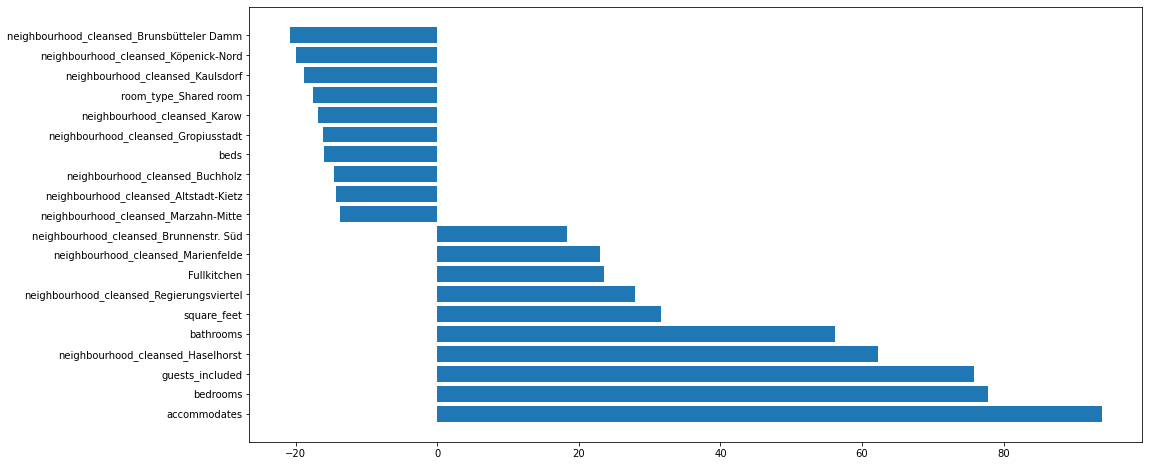

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(16,8))
axs.set_title('')
axs.barh(most_important_features['feature'], most_important_features['importance'], color='tab:blue')
plt.show()